### Import neccassary packages

In [8]:
import pandas as pd
import numpy as np
from classes.import_data import package_directory, parameters
from classes.import_data import import_pkl_data
from classes.scenario_plots import sc_plot, PlotDropDown
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Identify the actual path of this jupyter file

In [9]:
PACKAGEDIR = package_directory()
print(PACKAGEDIR)

e:\GFPM\Toolbox for GFPMpt\analyses_toolbox_gfpmpt


### Import data

In [10]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()
data = data["data_periods"]
data_std = import_pkl.validation(data=data)
print(data_std)

AttributeError: 'import_pkl_data' object has no attribute 'validation'

### Plot predefined scenario results 

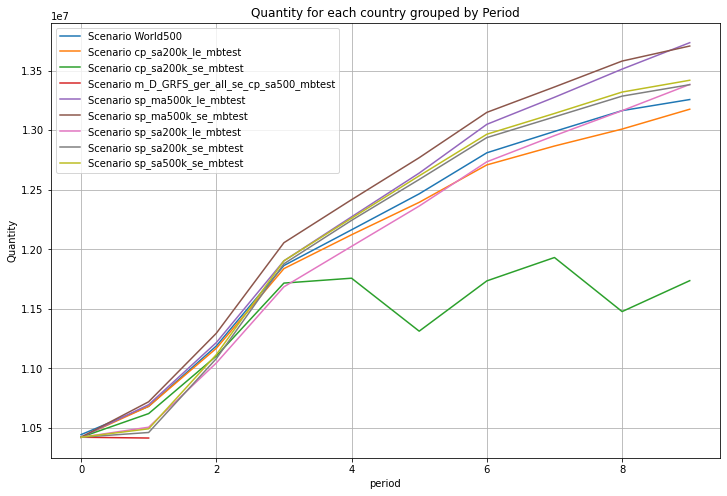

In [ ]:
sc_plot = sc_plot()
sc_plot.predefined_plot(data)

### Interactive scenario results (quantities)

In [ ]:
plot_dropdown_instance = PlotDropDown(data)

interactive(children=(Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4'…

### Interactive scenario results (prices)

In [ ]:
#Dropdown
region_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['RegionCode'].unique()),
    value='Alle',
    description='Select RegionCode:',
    disabled=False,
)

model_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['Model'].unique()),
    value='Alle',
    description='Select Model:',
    disabled=False,
)

id_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['ID'].unique()),
    value='Alle',
    description='Select ID:',
    disabled=False,
)

domain_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['domain'].unique()),
    value='Alle',
    description='Select Domain:',
    disabled=False,
)

commodity_code_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['CommodityCode'].unique()),
    value='Alle',
    description='Select CommodityCode:',
    disabled=False,
)

output_plot = widgets.Output()

output_table = widgets.Output()

def update_plot_data(region_code, model, id_value, domain, commodity_code):
    region_code_filter = [region_code] if region_code != 'Alle' else data['RegionCode'].unique()
    model_filter = [model] if model != 'Alle' else data['Model'].unique()
    id_filter = [id_value] if id_value != 'Alle' else data['ID'].unique()
    domain_filter = [domain] if domain != 'Alle' else data['domain'].unique()
    commodity_code_filter = [commodity_code] if commodity_code != 'Alle' else data['CommodityCode'].unique()

    filtered_data = data[
        (data['RegionCode'].isin(region_code_filter)) &
        (data['Model'].isin(model_filter)) &
        (data['ID'].isin(id_filter)) &
        (data['domain'].isin(domain_filter)) &
        (data['CommodityCode'].isin(commodity_code_filter))
    ]
    
    grouped_data = filtered_data.groupby(['Period', 'Scenario']).sum().reset_index()

    with output_plot:
        clear_output(wait=True)
        plt.figure(figsize=(12, 8))
        bar_width = 0.2
        for i, scenario_value in enumerate(grouped_data['Scenario'].unique()):
            subset = grouped_data[grouped_data['Scenario'] == scenario_value]
            x_positions = subset['Period'] + i * bar_width
            plt.bar(x_positions, subset['price'], width=bar_width, label=f'Scenario {scenario_value}')

        plt.title(f'Price for each scenario grouped by Period - RegionCode: {region_code}, Model: {model}, ID: {id_value}, Domain: {domain}, CommodityCode: {commodity_code}')
        plt.xlabel('Period')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

#show Table of selected drop down  
    with output_table:
        clear_output(wait=True)
        display_table = filtered_data[['Period', 'RegionCode', 'Model', 'ID', 'domain', 'CommodityCode', 'Scenario', 'quantity', 'price']] 
        display(display_table)

interactive_plot_update = widgets.interactive(
    update_plot_data,
    region_code=region_dropdown,
    model=model_dropdown,
    id_value=id_dropdown,
    domain=domain_dropdown,
    commodity_code=commodity_code_dropdown
)

def update_outputs(*args):
    update_plot_data(region_dropdown.value, model_dropdown.value, id_dropdown.value, domain_dropdown.value, commodity_code_dropdown.value)

region_dropdown.observe(update_outputs, 'value')
model_dropdown.observe(update_outputs, 'value')
id_dropdown.observe(update_outputs, 'value')
domain_dropdown.observe(update_outputs, 'value')
commodity_code_dropdown.observe(update_outputs, 'value')

display(region_dropdown, model_dropdown, id_dropdown, domain_dropdown, commodity_code_dropdown)
#display(interactive_plot_update)
display(widgets.HBox([output_plot, output_table]))


NameError: name 'widgets' is not defined